In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/HW5')
import mltools as ml

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import sys
sys.path.append('/content/drive/MyDrive/HW5/mltools')
import seaborn as sns
from collections import Counter

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
directory = os.path.join(os.getcwd(), 'dataset_diabetes')
df = pd.read_csv(os.path.join(directory, '/content/diabetic_dataupdated2.csv'))


#Statistical Analysis


In [ ]:
df.columns


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Cu,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Cu,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfA,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Cu,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Cu,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  object
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0
number_emergency,101766.0,1.978362e-01,9.304723e-01,0.0,0.0,0.0,0.000000e+00,76.0


# Visualization

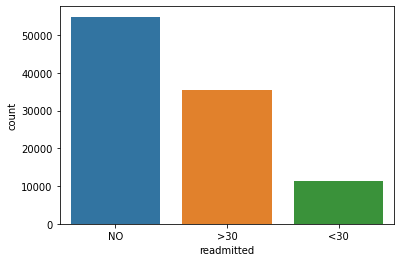

In [ ]:
sns.countplot(x = 'readmitted',data = df)

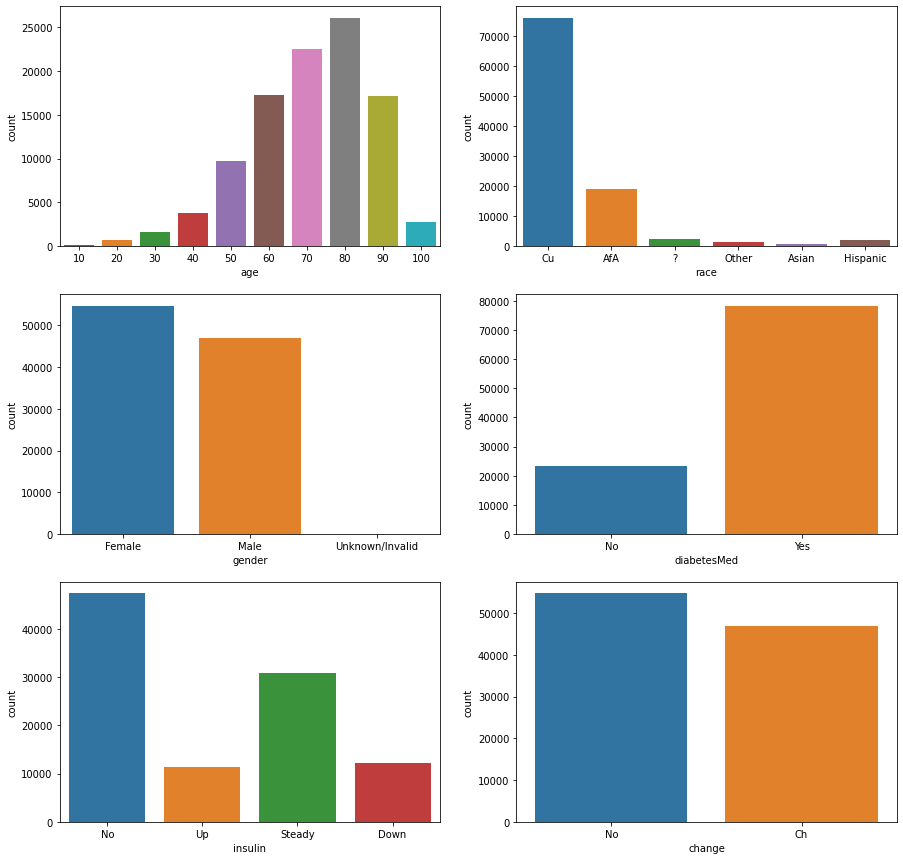

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
df["age"].replace({"[0-10)": 10,"[10-20)": 20, "[20-30)": 30,  "[30-40)": 40, "[40-50)": 50}, inplace=True)
df["age"].replace({"[50-60)": 60,"[60-70)": 70, "[70-80)": 80,  "[80-90)": 90, "[90-100)": 100}, inplace=True)
sns.countplot(x = 'age',data = df, ax=axs[0,0])
sns.countplot(x = 'race',data = df, ax=axs[0,1])
sns.countplot(x = 'gender',data = df, ax=axs[1,0])
sns.countplot(x = 'diabetesMed',data = df, ax=axs[1,1])
sns.countplot(x = 'insulin',data = df, ax=axs[2,0])
sns.countplot(x = 'change',data = df, ax=axs[2,1])




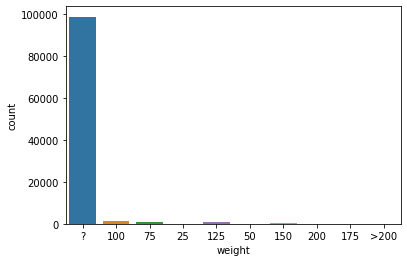

In [ ]:
df["weight"].replace({"[0-25)":25, "[25-50)": 50, "[50-75)": 75, "[75-100)": 100, "[100-125)": 125, "[125-150)": 150, "[150-175)": 175, "[175-200)": 200}, inplace=True)
sns.countplot(x = 'weight',data = df)




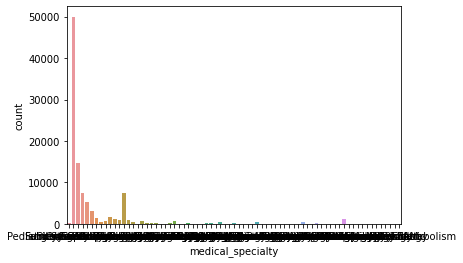

In [ ]:
sns.countplot(x = 'medical_specialty',data = df)

In [ ]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

# Data Processing

In [ ]:
df["gender"].replace({"Female": 0, "Male": 1, "Unknown/Invalid": 2}, inplace=True)
df["age"].replace({"[0-10)": 10,"[10-20)": 20, "[20-30)": 30,  "[30-40)": 40, "[40-50)": 50}, inplace=True)
df["age"].replace({"[50-60)": 60,"[60-70)": 70, "[70-80)": 80,  "[80-90)": 90, "[90-100)": 100}, inplace=True)
df["max_glu_serum"].replace({"None": 0, "Norm": 1, ">200": 2, ">300": 3}, inplace=True)
df["A1Cresult"].replace({"None": 0, "Norm": 1, ">7": 2, ">8": 3}, inplace=True)
df["metformin"].replace({"No": 0, "Steady": 1, "Up": 2}, inplace=True)
df["repaglinide"].replace({"No": 0, "Steady": 1, "Up": 2}, inplace=True)
df["readmitted"].replace({"NO": 0, "<30": 1, ">30": 2}, inplace=True)
df["change"].replace({"NO": 0, "Ch": 1}, inplace=True)
df["diabetesMed"].replace({"NO": 0, "Yes": 1}, inplace=True)
df = df.replace("No", 0)
df = df.replace("Steady", 1)
df = df.replace("Ch", 1)
df = df.replace("Up", 2)
df = df.replace("Down", 3)
df = df.replace("Norm", 0)
df = df.replace("Yes", 1)
df["weight"].replace({"?": 0, "[0-25)":25, "[25-50)": 50, "[50-75)": 75, "[75-100)": 100, "[100-125)": 125, "[125-150)": 150, "[150-175)": 175, "[175-200)": 200, ">200" : 200}, inplace=True)
df['weight'] = df['weight'].replace(0, df['weight'].mean())




 









In [ ]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Cu,0,10,3.102461,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Cu,0,20,3.102461,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,2
2,64410,86047875,AfA,0,30,3.102461,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,500364,82442376,Cu,1,40,3.102461,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
4,16680,42519267,Cu,1,50,3.102461,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
df.drop(["encounter_id", "patient_nbr", "payer_code", "weight"], axis=1, inplace=True)
df.drop([ "diag_1",	"diag_2", "diag_3"], axis=1, inplace=True)

In [ ]:
df.drop([ "race"], axis=1, inplace=True)

In [ ]:
df.drop([ "medical_specialty"], axis=1, inplace=True)

In [ ]:

df.drop([ "age"], axis=1, inplace=True)



In [ ]:
df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,10,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,20,1,1,7,3,59,0,18,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,2
2,0,30,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,40,1,1,7,2,44,1,16,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
4,1,50,1,1,7,1,51,0,8,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [ ]:
print(type(df))
print(df.shape)
df = df.to_numpy()

<class 'pandas.core.frame.DataFrame'>
(101766, 40)


# Model Exploration for multi-class classification using UCI ML Library

In [ ]:
X = df[0:5000,0:38]
Y= df[0:5000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
X,Y = ml.shuffleData(X,Y)  
print(np.unique(Y))



[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  2  1 ...  0  0  0]
 [ 1  1  1 ...  0  0  0]
 [ 1  6  1 ...  0  0  0]]
[0 2 0 ... 0 0 1]
[0 1 2]


In [ ]:
print(np.unique(Y))

[0 1 2]


#Decision Trees

[0.46825, 0.435, 0.365, 0.3415, 0.3355, 0.3355, 0.335, 0.3355, 0.3355, 0.335, 0.3355, 0.335, 0.335, 0.3355, 0.3355]
[0.456, 0.45, 0.483, 0.506, 0.506, 0.505, 0.504, 0.506, 0.505, 0.504, 0.506, 0.504, 0.505, 0.506, 0.506]


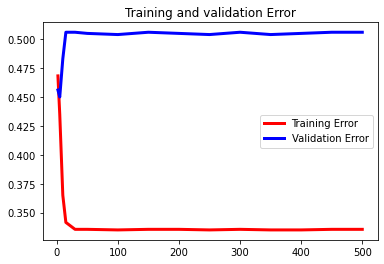

In [ ]:
maxdepth=[2,5,10,15,30,50,100,150,200,250,300,350,400,450,500]
ErrorT=[]
ErrorV=[]

for i in maxdepth:
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=i, minParent=10, minLeaf=10)
    learner.err(Xtr, Ytr) # train AUC
    ErrorT.append(learner.err(Xtr, Ytr))
    ErrorV.append(learner.err(Xva, Yva))

print(ErrorT)
print(ErrorV)
    
plt.plot(maxdepth, ErrorT, 'r-', lw=3, label="Training Error")
plt.plot(maxdepth, ErrorV, 'b-', lw=3, label="Validation Error")
plt.title("Training and validation Error")
plt.legend()

In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
maxdepth=[2,5,10,15,30,50,100,150,200,250,300,350,400]
minparent=[2,5,10,15,30,50,100,150,200,250,300,350,400]
ErrorT=[]
ErrorV=[]

for i in maxdepth:
    for j in minparent:
        learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=i, minParent=10, minLeaf=10)
        learner.err(Xtr, Ytr) # train AUC
        ErrorT.append(learner.err(Xtr, Ytr))
        ErrorV.append(learner.err(Xva, Yva))

print(ErrorT)
print(ErrorV)
print("Min Error from decision trees by varying maximum depth and minimum parent  is : ", min(ErrorV))

[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1 18 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 1  1  3 ...  0  0  0]]
[0 2 0 ... 0 0 0]
[0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.452125, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.43325, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.38525, 0.3415, 0.341875, 0.341625, 0.341625, 0.341875, 0.341875, 0.34175, 0.341875, 0.341625, 0.341625, 0.341875, 0.34175, 0.34175, 0.332375, 0.332375, 0.332125, 0.33225, 0.332, 0.33225, 0.332375, 0.332, 0.332, 0.33225, 0.332375, 0.332, 0.332, 0.332, 0.332, 0.33225, 0.332375, 0.332125, 0.332125, 0.33225, 0.332125, 0.332375, 0.332125, 0.332375, 0.332375, 0.332375, 0.33225, 0.332, 0.332125, 0.332375, 0.332125, 0.332, 0.332375, 0.33225, 0.332125, 0.332, 0.332125, 0.3

# Random Forest

In [ ]:
tree_one = ml.dtree.treeClassify(Xtr, Ytr, minParent=45, maxDepth=25, nFeatures=6) # The nFeatures makes it random
print(tree_one.err(Xtr, Ytr))
print(tree_one.err(Xva, Yva))

0.43875
0.469


In [ ]:
np.random.seed(0) # Resetting the seed in case you ran other stuff.
n_bags = 10
bags = [] # self.learners
for l in range(n_bags):
# Each boosted data is the size of the original data.
    Xi, Yi = ml.bootstrapData(Xtr, Ytr, Xtr.shape[0]) 
# Train the model on that draw
    tree = ml.dtree.treeClassify(Xi, Yi, minParent=2, maxDepth=5, nFeatures=6)
    bags.append(tree)

In [ ]:
Train_Error = []
Validation_Error = []
num = list(range(10))
for l in range(n_bags):
    print("Decision Tree : {0}".format(l))
    print('Train Error', bags[l].err(Xtr, Ytr))
    print('Validation Error', bags[l].err(Xva, Yva))
    Train_Error.append(bags[l].err(Xtr, Ytr))
    Validation_Error.append(bags[l].err(Xva, Yva))


print(Train_Error)
print(Validation_Error)
Error = np.mean(Validation_Error)
print(Error)

Decision Tree : 0
Train Error 0.4585
Validation Error 0.48
Decision Tree : 1
Train Error 0.4815
Validation Error 0.494
Decision Tree : 2
Train Error 0.4765
Validation Error 0.501
Decision Tree : 3
Train Error 0.45325
Validation Error 0.465
Decision Tree : 4
Train Error 0.455
Validation Error 0.485
Decision Tree : 5
Train Error 0.47275
Validation Error 0.483
Decision Tree : 6
Train Error 0.5025
Validation Error 0.527
Decision Tree : 7
Train Error 0.472
Validation Error 0.485
Decision Tree : 8
Train Error 0.45575
Validation Error 0.474
Decision Tree : 9
Train Error 0.48325
Validation Error 0.506
[0.4585, 0.4815, 0.4765, 0.45325, 0.455, 0.47275, 0.5025, 0.472, 0.45575, 0.48325]
[0.48, 0.494, 0.501, 0.465, 0.485, 0.483, 0.527, 0.485, 0.474, 0.506]
0.49000000000000005


In [ ]:
class BaggedTree(ml.base.classifier):
    def __init__(self, learners):

        self.learners = learners
    def predictSoft(self, X):

        n_bags = len(self.learners)
        preds = [self.learners[l].predictSoft(X) for l in range(n_bags)]
        return np.mean(preds, axis=0)
bt = BaggedTree(bags)
bt.classes = np.unique(Y)
print("{0:>15}: {1:.4f}".format('Train Error', bt.err(Xtr, Ytr)))
print("{0:>15}: {1:.4f}".format('Validation Error', bt.err(Xva, Yva)))

    Train Error: 0.4228
Validation Error: 0.4390


# KNN

[[0.         0.71428571 0.88888889 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.5        0.         0.62962963 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.         0.07407407 ... 0.         0.         0.        ]]
[0. 1. 0. ... 0. 0. 0.]
[[0.       0.       0.       0.       0.      ]
 [0.357375 0.343125 0.32175  0.3025   0.280125]
 [0.402    0.38875  0.369875 0.347875 0.3245  ]
 [0.43125  0.4165   0.40125  0.380625 0.357625]
 [0.4455   0.4315   0.414375 0.394625 0.373875]]
[[0.563  0.563  0.563  0.563  0.563 ]
 [0.5135 0.5155 0.5135 0.517  0.52  ]
 [0.488  0.4905 0.491  0.4935 0.501 ]
 [0.4775 0.479  0.4795 0.481  0.4845]
 [0.475  0.4785 0.48   0.4835 0.483 ]]


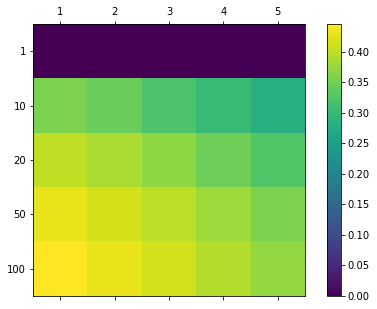

In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)

K = [1, 10, 20, 50, 100]
A = [1,2,3,4,5] #A = range(1,6)
tr_error = np.zeros((len(K),len(A)))
va_error = np.zeros((len(K),len(A)))
for i,k in enumerate(K):
    for j,a in enumerate(A):
# train learner using k and a
        learner = ml.knn.knnClassify()
        learner.train(Xtr, Ytr, K=k, alpha=a)
        tr_error[i][j] = learner.err(Xtr, Ytr)
        va_error[i][j] = learner.err(Xva, Yva)
# Now plot it
print(tr_error)
print(va_error)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_error, interpolation = 'nearest')
#cax = ax.matshow(va_auc, interpolation = 'nearest')
f.colorbar(cax)
ax.set_xticklabels(['regularization']+A)
ax.set_yticklabels(['KNN Values']+K)
plt.show()

[[0.       0.       0.       0.       0.      ]
 [0.357375 0.343125 0.32175  0.3025   0.280125]
 [0.402    0.38875  0.369875 0.347875 0.3245  ]
 [0.43125  0.4165   0.40125  0.380625 0.357625]
 [0.4455   0.4315   0.414375 0.394625 0.373875]]
[[0.563  0.563  0.563  0.563  0.563 ]
 [0.5135 0.5155 0.5135 0.517  0.52  ]
 [0.488  0.4905 0.491  0.4935 0.501 ]
 [0.4775 0.479  0.4795 0.481  0.4845]
 [0.475  0.4785 0.48   0.4835 0.483 ]]


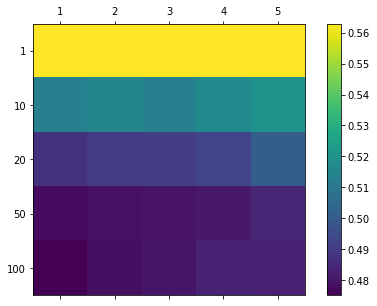

In [ ]:
# Now plot it
print(tr_error)
print(va_error)
f, ax = plt.subplots(1, 1, figsize=(8, 5))
#cax = ax.matshow(tr_error, interpolation = 'nearest')
cax = ax.matshow(va_error, interpolation = 'nearest')
f.colorbar(cax)
ax.set_xticklabels(['regularization']+A)
ax.set_yticklabels(['KNN Values']+K)
plt.show()

#Neural Network

In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
print(X.shape)
print(Y.shape)
print(np.unique(Y))


[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1 18 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 1  1  3 ...  0  0  0]]
[0 2 0 ... 0 0 0]
(10000, 38)
(10000,)
[0 1 2]


[[0.         0.71428571 0.88888889 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.5        0.14285714 0.         ... 0.         0.         0.        ]
 [0.5        0.         0.         ... 0.         0.         0.        ]
 [0.5        0.71428571 0.         ... 0.         0.         0.        ]]
[0.  1.  0.  ... 0.  0.  0.5]
[38, 5, 3]
it 1 : Jsur = 0.5922151245411443, J01 = 0.5065
it 2 : Jsur = 0.5802181491319017, J01 = 0.49825
it 4 : Jsur = 0.5729968018408043, J01 = 0.482
it 8 : Jsur = 0.56846817530409, J01 = 0.47525
it 16 : Jsur = 0.5653721399702856, J01 = 0.47025
it 32 : Jsur = 0.5625126345996847, J01 = 0.46625
it 64 : Jsur = 0.5600280417922556, J01 = 0.45925
it 128 : Jsur = 0.5584043074355044, J01 = 0.45475
it 256 : Jsur = 0.5573317595058476, J01 = 0.45575
[38, 10, 3]
it 1 : Jsur = 0.5918243490258008, J01 = 0.5065
it 2 : Jsur = 0.579684

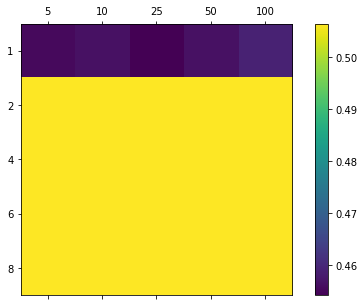

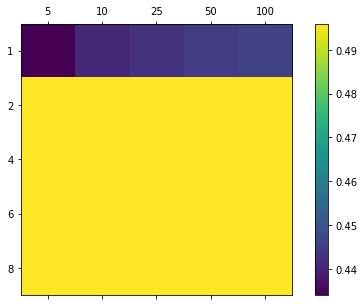

In [ ]:
X = df[0:5000,0:38]
Y= df[0:5000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
layers = [1, 2, 4, 6, 8]
nodes = [5, 10, 25, 50, 100]
input = [38]
output = [3]

tr_err = np.zeros((len(layers),len(nodes)))
va_err= np.zeros((len(layers),len(nodes)))


for n,k in enumerate(layers):
    for i, j in enumerate(nodes):
        
        size = input+k*[j]+output
        print(size)

        nn = ml.nnet.nnetClassify()
        nn.init_weights(size, 'random',Xtr, Ytr) # as many layers nodes you want

        nn.train(Xtr, Ytr, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_err[n][i] = nn.err(Xtr, Ytr)
        va_err[n][i] = nn.err(Xva, Yva)

print(tr_err)
print(va_err)

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(tr_err, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()


f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(va_err, interpolation='nearest')
f.colorbar(cax)
ax.set_xticklabels(['']+nodes)
ax.set_yticklabels(['']+layers)
plt.show()


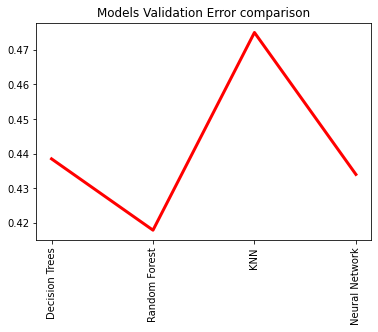

In [ ]:
models = ["Decision Trees", "Random Forest", "KNN", "Neural Network"]
Y_error = [0.4385, 0.4179, 0.475, 0.434]
plt.plot(models, Y_error, 'r-', lw=3, label="Training Error")
plt.xticks(rotation=90)
plt.title('Models Validation Error comparison')
plt.show()

#Advanced Libraries for multi-class classification

In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
print(X.shape)
print(Y.shape)
print(np.unique(Y))


[[0.         0.71428571 0.88888889 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.5        0.         0.62962963 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.         0.07407407 ... 0.         0.         0.        ]]
[0. 1. 0. ... 0. 0. 0.]
(10000, 38)
(10000,)
[0.  0.5 1. ]


Random Forest Classifier


In [ ]:
X = df[:,0:38]
Y= df[:,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
X,Y = ml.shuffleData(X,Y)  
print(np.unique(Y))

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=100, max_depth=180, max_features=11)

learner.fit(Xtr, Ytr)

tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1  1 ...  0  0  1]
 [ 0  2  3 ...  0  0  1]
 [ 1  1  1 ...  0  0  0]]
[0 2 0 ... 0 0 0]
[0 1 2]
Training Accuracy: 0.999348998317222
Testing Accuracy: 0.5678769714538398


Multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
learner = MLPClassifier(hidden_layer_sizes=(200,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)
learner.fit(Xtr, Ytr)
tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.5872894992200263
Testing Accuracy: 0.5801110401415025


KNN

In [ ]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

number_of_neighbours = list(range(1, 31))
accuracy = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(Xtr, Ytr)
    prediction = knn_model.predict(Xva)
    accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction, Yva)))


print('Highest value: ',accuracy.values.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Highest value:  0.5245


In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
print(X.shape)
print(Y.shape)
print(np.unique(Y))

[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1 18 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 1  1  3 ...  0  0  0]]
[0 2 0 ... 0 0 0]
(10000, 38)
(10000,)
[0 1 2]


In [ ]:
print(np.unique(Y))
import tensorflow as tf

learner = tf.keras.models.Sequential()
learner.add(tf.keras.layers.Dense(units=6, activation='relu'))
learner.add(tf.keras.layers.Dense(units=6, activation='relu'))
learner.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
learner.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

learner.fit(Xtr, Ytr, batch_size = 32, epochs = 100)

tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)

print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

[0 1 2]
Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1126
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.1493
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5033
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5035
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5035
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5035
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5035
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5035
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5035
Epoch 10/100
250/250 [=========================

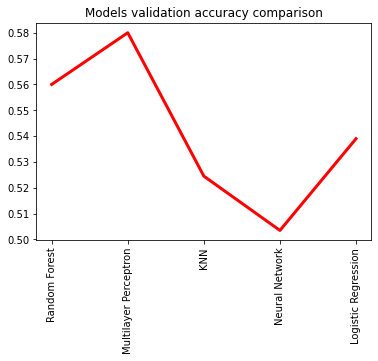

In [ ]:
models = ["Random Forest", "Multilayer Perceptron", "KNN", "Neural Network", "Logistic Regression"]
Y_error = [0.56, 0.58, 0.5245, 0.5035, 0.539]
plt.plot(models, Y_error, 'r-', lw=3, label="Training Error")
plt.xticks(rotation=90)
plt.title('Models validation accuracy comparison')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
learner = LogisticRegression(fit_intercept = True,class_weight= 'balanced', penalty = 'l1', solver='liblinear')
learner.fit(Xtr, Ytr)
tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.536125
Testing Accuracy: 0.539


In [ ]:
from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
learner = LogisticRegression(fit_intercept = True, penalty = 'l1', solver='liblinear')
learner.fit(Xtr, Ytr)
tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.550375
Testing Accuracy: 0.539


#Binary Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from collections import Counter

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
directory = os.path.join(os.getcwd(), 'dataset_diabetes')
df = pd.read_csv(os.path.join(directory, '/content/diabetic_dataupdated2.csv'))
df["gender"].replace({"Female": 0, "Male": 1, "Unknown/Invalid": 2}, inplace=True)
df["age"].replace({"[0-10)": 10,"[10-20)": 20, "[20-30)": 30,  "[30-40)": 40, "[40-50)": 50}, inplace=True)
df["age"].replace({"[50-60)": 60,"[60-70)": 70, "[70-80)": 80,  "[80-90)": 90, "[90-100)": 100}, inplace=True)
df["max_glu_serum"].replace({"None": 0, "Norm": 1, ">200": 2, ">300": 3}, inplace=True)
df["A1Cresult"].replace({"None": 0, "Norm": 1, ">7": 2, ">8": 3}, inplace=True)
df["metformin"].replace({"No": 0, "Steady": 1, "Up": 2}, inplace=True)
df["repaglinide"].replace({"No": 0, "Steady": 1, "Up": 2}, inplace=True)
df["readmitted"].replace({"NO": 0, "<30": 0, ">30": 1}, inplace=True)
df["change"].replace({"NO": 0, "Ch": 1}, inplace=True)
df["diabetesMed"].replace({"NO": 0, "Yes": 1}, inplace=True)
df = df.replace("No", 0)
df = df.replace("Steady", 1)
df = df.replace("Ch", 1)
df = df.replace("Up", 2)
df = df.replace("Down", 3)
df = df.replace("Norm", 0)
df = df.replace("Yes", 1)
df["weight"].replace({"?": 0, "[0-25)":25, "[25-50)": 50, "[50-75)": 75, "[75-100)": 100, "[100-125)": 125, "[125-150)": 150, "[150-175)": 175, "[175-200)": 200, ">200" : 200}, inplace=True)
df['weight'] = df['weight'].replace(0, df['weight'].mean())
df.drop(["encounter_id", "patient_nbr", "payer_code", "weight"], axis=1, inplace=True)
df.drop([ "diag_1",	"diag_2", "diag_3"], axis=1, inplace=True)
df.drop([ "race"], axis=1, inplace=True)
df.drop([ "medical_specialty"], axis=1, inplace=True)

df.drop([ "age"], axis=1, inplace=True)

In [ ]:
print(type(df))
print(df.shape)
df = df.to_numpy()

<class 'pandas.core.frame.DataFrame'>
(101766, 40)


In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
from sklearn import preprocessing
import numpy as np

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr.astype(np.float64))

print(X.shape)
print(Y.shape)
print(np.unique(Y))

[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1 18 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 1  1  3 ...  0  0  0]]
[0 1 0 ... 0 0 0]
(10000, 38)
(10000,)
[0 1]


In [ ]:
X = df[:,0:38]
Y= df[:,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
X,Y = ml.shuffleData(X,Y)  
print(np.unique(Y))

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

learner = RandomForestClassifier(n_estimators=150, max_depth=150, max_features=11)

learner.fit(Xtr, Ytr)

tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1  1 ...  0  0  1]
 [ 0  2  3 ...  0  0  1]
 [ 1  1  1 ...  0  0  0]]
[0 1 0 ... 0 0 0]
[0 1]
Training Accuracy: 0.9994963949246435
Testing Accuracy: 0.6467842578489658


In [ ]:
from sklearn.neural_network import MLPClassifier
learner = MLPClassifier(hidden_layer_sizes=(200,), alpha=0.05, learning_rate="adaptive", activation='tanh', solver='adam', max_iter=500)
learner.fit(Xtr, Ytr)
tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.667190743493054
Testing Accuracy: 0.6602466466859922


In [ ]:
import tensorflow as tf

learner = tf.keras.models.Sequential()
learner.add(tf.keras.layers.Dense(units=6, activation='relu'))
learner.add(tf.keras.layers.Dense(units=6, activation='relu'))
learner.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
learner.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

learner.fit(Xtr, Ytr, batch_size = 32, epochs = 100)

tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)

print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Epoch 1/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6498
Epoch 2/100
2545/2545 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 3/100
2545/2545 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 4/100
2545/2545 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 5/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 6/100
2545/2545 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 7/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 8/100
2545/2545 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 9/100
2545/2545 [==============================] - 5s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6507
Epoch 10/100
2545/2545 [=============

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

number_of_neighbours = list(range(1, 31))
accuracy = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(Xtr, Ytr)
    prediction = knn_model.predict(Xva)
    accuracy = accuracy.append(pd.Series(metrics.accuracy_score(prediction, Yva)))


print('Highest value: ',accuracy.values.max())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


Highest value:  0.6495356949835405


In [ ]:
from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
learner = LogisticRegression(fit_intercept = True,class_weight= 'balanced', penalty = 'l1', solver='liblinear')
learner.fit(Xtr, Ytr)
tr_pred = learner.predict(Xtr)
predictions = learner.predict(Xva)
print("Training Accuracy:",metrics.accuracy_score(Ytr, tr_pred))
print("Testing Accuracy:",metrics.accuracy_score(Yva, predictions))

Training Accuracy: 0.5946716126417156
Testing Accuracy: 0.594113889844249


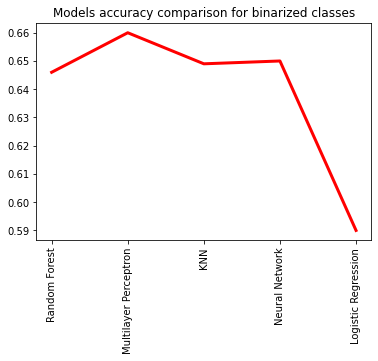

In [ ]:
models = ["Random Forest", "Multilayer Perceptron", "KNN", "Neural Network", "Logistic Regression"]
Y_error = [0.646, 0.66, 0.649, 0.65, 0.59]
plt.plot(models, Y_error, 'r-', lw=3, label="Training Error")
plt.xticks(rotation=90)
plt.title('Models accuracy comparison for binarized classes')
plt.show()

#Grid Search and PipeLine

###Logistic Regression Pipeline

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

In [ ]:
X = df[0:10000,0:38]
Y= df[0:10000,39]
print(X)
print(Y)
X,Y = ml.shuffleData(X,Y)  
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
from sklearn import preprocessing
import numpy as np

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr.astype(np.float64))

print(X.shape)
print(Y.shape)
print(np.unique(Y))

[[ 0  6 25 ...  0  0  0]
 [ 0  1  1 ...  0  0  1]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 1  1 18 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 1  1  3 ...  0  0  0]]
[0 1 0 ... 0 0 0]
(10000, 38)
(10000,)
[0 1]


In [ ]:
smote = SMOTE(random_state=0)
Xtr_smote, Ytr_smote = smote.fit_resample(Xtr, Ytr)

In [ ]:

from sklearn.linear_model import LogisticRegression
#Balanced class weight, penalty = l1
reg = LogisticRegression(fit_intercept = True,class_weight= 'balanced', penalty = 'l1', solver='liblinear').fit(Xtr, Ytr)
print(cross_val_score(reg, Xtr, Ytr, cv = 4, scoring = 'roc_auc'))
#Balanced class weights, penalty = l2
reg_l2_balanced = LogisticRegression(fit_intercept = True,class_weight= 'balanced', penalty = 'l2').fit(Xtr, Ytr)
print(cross_val_score(reg_l2_balanced, Xtr, Ytr, cv = 4, scoring = 'roc_auc'))



[0.60685229 0.59962324 0.62117477 0.61283111]
[0.60657469 0.5996084  0.62109    0.61274423]


In [ ]:
Crossval1 = [0.62087709, 0.60207826, 0.61099426, 0.62097484]
Crossval2 = [0.62075449, 0.60197151, 0.6107513,  0.62099597]
print(np.mean(Crossval1))
print(np.mean(Crossval2))

0.6137311125
0.6136183175000001


In [ ]:
#Balanced class weights, penalty = l2
reg_l2_balanced = LogisticRegression(fit_intercept = True).fit(Xtr, Ytr)
print(cross_val_score(reg_l2_balanced, Xtr, Ytr, cv = 4, scoring = 'roc_auc'))
#Non-balanced classes, l1 penalty
reg_l1_nb = LogisticRegression(fit_intercept = True, penalty = 'l1', solver='liblinear').fit(Xtr, Ytr)
print(cross_val_score(reg_l1_nb, Xtr, Ytr, cv = 4, scoring = 'roc_auc'))

[0.60544949 0.59882648 0.62063124 0.6122505 ]
[0.60566881 0.59876397 0.62075414 0.61228652]


In [ ]:
#Non-balanced classes, l1 penalty, using SMOTE
reg_l1_nb_smote = LogisticRegression(fit_intercept = True, penalty = 'l1', solver='liblinear').fit(Xtr_smote, Ytr_smote)
print(cross_val_score(reg_l1_nb_smote, Xtr, Ytr, cv = 4, scoring = 'roc_auc'))
#l2, non-balanced
reg_l2_nb = LogisticRegression(fit_intercept = True).fit(Xtr, Ytr)
print(cross_val_score(reg_l2_nb, Xtr, Ytr, cv = 4, scoring = 'roc_auc'))
model = Pipeline([
        ('sampling', SMOTE()),
        ('model', LogisticRegression())
    ])
model.get_params().keys()

[0.60566351 0.59876397 0.62075202 0.61228016]
[0.60544949 0.59882648 0.62063124 0.6122505 ]


dict_keys(['memory', 'steps', 'verbose', 'sampling', 'model', 'sampling__k_neighbors', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])

In [ ]:
Cross1 = [0.60936519, 0.61546506, 0.60915341, 0.59360333]
Cross2 = [0.60923289, 0.61521632, 0.60930272, 0.59369229]
print(np.mean(Cross1))
print(np.mean(Cross2))


0.6068967475
0.606861055


In [ ]:
#This is using oversampled data
penalty = ['l1', 'l2']
c = np.logspace(0, 3, 10)
max_iter = 2000
print(c), 
#hyperp = dict(C = c, penalty = penalty) 
param_grid = [
  {'model__penalty': ['l1'], 'model__solver': ['liblinear'], 'model__C' : c, 'model__class_weight': ['balanced', None]},
  {'model__penalty': ['l2'], 'model__solver': ['lbfgs'], 'model__class_weight': ['balanced', None], 'model__C' : c},]

clf = GridSearchCV(model, param_grid, cv = 3, verbose = 2, scoring= 'roc_auc')
best_model = clf.fit(Xtr, Ytr)
best_model.best_estimator_.get_params()

 



[   1.            2.15443469    4.64158883   10.           21.5443469
   46.41588834  100.          215.443469    464.15888336 1000.        ]
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END model__C=1.0, model__class_weight=balanced, model__penalty=l1, model__solver=liblinear; total time=   0.4s
[CV] END model__C=1.0, model__class_weight=balanced, model__penalty=l1, model__solver=liblinear; total time=   0.4s
[CV] END model__C=1.0, model__class_weight=balanced, model__penalty=l1, model__solver=liblinear; total time=   0.4s
[CV] END model__C=1.0, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.4s
[CV] END model__C=1.0, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.4s
[CV] END model__C=1.0, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.3s
[CV] END model__C=2.154434690031884, model__class_weight=balanced, model__penalty=l1, model__solver=liblinear; t

{'memory': None,
 'model': LogisticRegression(C=1000.0),
 'model__C': 1000.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 100,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l2',
 'model__random_state': None,
 'model__solver': 'lbfgs',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False,
 'sampling': SMOTE(),
 'sampling__k_neighbors': 5,
 'sampling__n_jobs': None,
 'sampling__random_state': None,
 'sampling__sampling_strategy': 'auto',
 'steps': [('sampling', SMOTE()), ('model', LogisticRegression(C=1000.0))],
 'verbose': False}

In [ ]:
best_model.best_estimator_

Pipeline(steps=[('sampling', SMOTE()), ('model', LogisticRegression(C=1000.0))])

In [ ]:
best_model.cv_results_

{'mean_fit_time': array([0.38099535, 0.35526021, 0.30495532, 0.29106514, 0.28370778,
        0.25886313, 0.25230511, 0.23051294, 0.20160055, 0.19782559,
        0.18581271, 0.18113748, 0.17096202, 0.16578611, 0.17289233,
        0.18133887, 0.17722631, 0.17468834, 0.17669765, 0.17168983,
        0.17848929, 0.17191505, 0.18686398, 0.18358103, 0.18386634,
        0.1969595 , 0.18540804, 0.18763733, 0.1810569 , 0.19238345,
        0.19221505, 0.18812148, 0.19314003, 0.18322015, 0.19440818,
        0.17453814, 0.18683815, 0.18305945, 0.19117117, 0.18083851]),
 'mean_score_time': array([0.00706045, 0.00694776, 0.00610638, 0.00728528, 0.00567754,
        0.00627096, 0.00695133, 0.00534042, 0.00770275, 0.00445501,
        0.00413918, 0.00518743, 0.00369247, 0.00394813, 0.00435583,
        0.00377846, 0.00362619, 0.00363429, 0.00360036, 0.00429972,
        0.00362945, 0.00348481, 0.00352645, 0.00353201, 0.00349752,
        0.00348536, 0.00355792, 0.00359519, 0.00352748, 0.00363525,
        0.

Random Forest Pipeline


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from collections import Counter

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
data_directory = os.path.join(os.getcwd(), 'dataset_diabetes')
diabetes = pd.read_csv(os.path.join(data_directory, '/content/diabetic_dataupdated2.csv'))
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diabetes, test_size=0.2, random_state=42)
train_set.head()
train_set.shape

(81412, 50)

In [ ]:
np.random.seed(0)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
random_state = 0

In [ ]:
df_train = train_set


In [ ]:
[(key, val/len(df_train.readmitted)) for (key, val) in Counter(df_train.readmitted).most_common()]

def binarize_readmitted(x):
    if x in ['<30']: # readmitted in less than 30 days is positive class
        return 1 
    else:
        return 0 
df_train['label'] = df_train.apply(lambda x: binarize_readmitted(x['readmitted']), axis=1)
[(key, val/len(df_train.readmitted)) for (key, val) in Counter(df_train['label']).most_common()]

[(0, 0.8885667960497224), (1, 0.1114332039502776)]

In [ ]:
df_train["gender"].replace({"Female": 0, "Male": 1, "Unknown/Invalid": 2}, inplace=True)
df_train["age"].replace({"[0-10)": 10,"[10-20)": 20, "[20-30)": 30,  "[30-40)": 40, "[40-50)": 50}, inplace=True)
df_train["age"].replace({"[50-60)": 60,"[60-70)": 70, "[70-80)": 80,  "[80-90)": 90, "[90-100)": 100}, inplace=True)
df_train["max_glu_serum"].replace({"None": 0, "Norm": 1, ">200": 2, ">300": 3}, inplace=True)
df_train["A1Cresult"].replace({"None": 0, "Norm": 1, ">7": 2, ">8": 3}, inplace=True)
df_train["metformin"].replace({"No": 0, "Steady": 1, "Up": 2}, inplace=True)
df_train["repaglinide"].replace({"No": 0, "Steady": 1, "Up": 2}, inplace=True)
df_train["readmitted"].replace({"NO": 0, "<30": 0, ">30": 1}, inplace=True)
df_train["change"].replace({"NO": 0, "Ch": 1}, inplace=True)
df_train["diabetesMed"].replace({"NO": 0, "Yes": 1}, inplace=True)
df_train= df_train.replace("No", 0)
df_train = df_train.replace("Steady", 1)
df_train = df_train.replace("Ch", 1)
df_train = df_train.replace("Up", 2)
df_train = df_train.replace("Down", 3)
df_train = df_train.replace("Norm", 0)
df_train = df_train.replace("Yes", 1)


In [ ]:
df_train.drop(["encounter_id", "patient_nbr", "payer_code", "weight"], axis=1, inplace=True)
df_train.drop([ "diag_1",	"diag_2", "diag_3"], axis=1, inplace=True)
df_train.drop([ "race"], axis=1, inplace=True)



In [ ]:
df_train.drop([ "medical_specialty"], axis=1, inplace=True)

In [ ]:
print(df_train.shape)


(81412, 42)


In [ ]:
Xtr = df_train.iloc[:,0:40]
Ytr = df_train.iloc[:,41]


In [ ]:
pipe = Pipeline([
        ('sampling', SMOTE(random_state=random_state)),
        ('model', RandomForestClassifier())
    ])

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'sampling', 'model', 'sampling__k_neighbors', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'model__bootstrap', 'model__ccp_alpha', 'model__class_weight', 'model__criterion', 'model__max_depth', 'model__max_features', 'model__max_leaf_nodes', 'model__max_samples', 'model__min_impurity_decrease', 'model__min_samples_leaf', 'model__min_samples_split', 'model__min_weight_fraction_leaf', 'model__n_estimators', 'model__n_jobs', 'model__oob_score', 'model__random_state', 'model__verbose', 'model__warm_start'])

In [ ]:
param_grid = {
    'model__n_estimators': [100, 500],
    'model__max_depth': [4, 6, 8, 10, 12],
    'model__random_state': [random_state]
}

# Recall = TP/TP+FN -> Of the ones that are positive, how many did we indicate as positive
# AUROC = area under curve TPR (TP/TP+FN) vs. FPR (FP/TN+FP) at various thresholds
scoring = ['accuracy', 'roc_auc', 'recall']

In [ ]:
clf = GridSearchCV(pipe, param_grid, cv=4, verbose=5, scoring=scoring, refit='roc_auc', return_train_score=True)
best_model = clf.fit(Xtr, Ytr)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END model__max_depth=4, model__n_estimators=100, model__random_state=0; accuracy: (train=0.653, test=0.655) recall: (train=0.338, test=0.335) roc_auc: (train=0.522, test=0.527) total time=   6.0s
[CV 2/4] END model__max_depth=4, model__n_estimators=100, model__random_state=0; accuracy: (train=0.646, test=0.641) recall: (train=0.342, test=0.336) roc_auc: (train=0.522, test=0.511) total time=   5.6s
[CV 3/4] END model__max_depth=4, model__n_estimators=100, model__random_state=0; accuracy: (train=0.649, test=0.647) recall: (train=0.335, test=0.334) roc_auc: (train=0.522, test=0.517) total time=   5.4s
[CV 4/4] END model__max_depth=4, model__n_estimators=100, model__random_state=0; accuracy: (train=0.638, test=0.640) recall: (train=0.359, test=0.350) roc_auc: (train=0.527, test=0.523) total time=   5.6s
[CV 1/4] END model__max_depth=4, model__n_estimators=500, model__random_state=0; accuracy: (train=0.639, test=0.644) re

Neural Network Pipeline

In [ ]:
from sklearn.neural_network import MLPClassifier

pipe = Pipeline([
        ('sampling', SMOTE(random_state=random_state)),
        ('model', MLPClassifier(random_state=random_state))
    ])

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'sampling', 'model', 'sampling__k_neighbors', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'model__activation', 'model__alpha', 'model__batch_size', 'model__beta_1', 'model__beta_2', 'model__early_stopping', 'model__epsilon', 'model__hidden_layer_sizes', 'model__learning_rate', 'model__learning_rate_init', 'model__max_fun', 'model__max_iter', 'model__momentum', 'model__n_iter_no_change', 'model__nesterovs_momentum', 'model__power_t', 'model__random_state', 'model__shuffle', 'model__solver', 'model__tol', 'model__validation_fraction', 'model__verbose', 'model__warm_start'])

In [ ]:
param_grid={
'model__learning_rate': ["constant"],
'model__hidden_layer_sizes': [(30, 10), (20, 20, 20), (20, 20, 15)],
'model__alpha': [.015], #between .01 and .5 is best. .1 seemed best after trying .01 to 1, started getting worse at .5 
'model__activation': ["relu"]
}

# Recall = TP/TP+FN -> Of the ones that are positive, how many did we indicate as positive
# AUROC = area under curve TPR (TP/TP+FN) vs. FPR (FP/TN+FP) at various thresholds
scoring = ['balanced_accuracy', 'accuracy', 'roc_auc', 'recall', 'precision']
clf = GridSearchCV(pipe, param_grid, cv=3, verbose=5, scoring=scoring, refit='roc_auc', return_train_score=True)

In [ ]:
best_model = clf.fit(Xtr, Ytr)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END model__activation=relu, model__alpha=0.015, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant; accuracy: (train=0.702, test=0.695) balanced_accuracy: (train=0.560, test=0.535) precision: (train=0.155, test=0.137) recall: (train=0.377, test=0.328) roc_auc: (train=0.603, test=0.568) total time= 2.1min
[CV 2/3] END model__activation=relu, model__alpha=0.015, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant; accuracy: (train=0.722, test=0.713) balanced_accuracy: (train=0.551, test=0.539) precision: (train=0.153, test=0.143) recall: (train=0.330, test=0.315) roc_auc: (train=0.597, test=0.568) total time= 1.3min
[CV 3/3] END model__activation=relu, model__alpha=0.015, model__hidden_layer_sizes=(30, 10), model__learning_rate=constant; accuracy: (train=0.773, test=0.765) balanced_accuracy: (train=0.548, test=0.534) precision: (train=0.167, test=0.149) recall: (train=0.259, test=0.236) roc_auc: (train=0.597, test=0.567) total time= 1.7min
[CV 1/3] E

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END model__activation=relu, model__alpha=0.015, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant; accuracy: (train=0.805, test=0.798) balanced_accuracy: (train=0.550, test=0.529) precision: (train=0.186, test=0.156) recall: (train=0.222, test=0.184) roc_auc: (train=0.611, test=0.574) total time= 1.7min
[CV 2/3] END model__activation=relu, model__alpha=0.015, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant; accuracy: (train=0.727, test=0.719) balanced_accuracy: (train=0.555, test=0.537) precision: (train=0.158, test=0.142) recall: (train=0.334, test=0.303) roc_auc: (train=0.605, test=0.571) total time= 1.2min
[CV 3/3] END model__activation=relu, model__alpha=0.015, model__hidden_layer_sizes=(20, 20, 15), model__learning_rate=constant; accuracy: (train=0.709, test=0.696) balanced_accuracy: (train=0.562, test=0.538) precision: (train=0.158, test=0.140) recall: (train=0.374, test=0.336) roc_auc: (train=0.614, test=0.573) total time= 1.1mi

In [ ]:
best_model.best_estimator_

Pipeline(steps=[('sampling', SMOTE(random_state=0)),
                ('model',
                 MLPClassifier(alpha=0.015, hidden_layer_sizes=(20, 20, 20),
                               random_state=0))])

In [ ]:
best_model.cv_results_


{'mean_fit_time': array([100.88405395, 106.22458013,  79.65073125]),
 'mean_score_time': array([0.22014546, 0.23558839, 0.18653576]),
 'mean_test_accuracy': array([0.72441445, 0.73245931, 0.7375441 ]),
 'mean_test_balanced_accuracy': array([0.53589863, 0.53965414, 0.53489925]),
 'mean_test_precision': array([0.14320152, 0.1469453 , 0.145894  ]),
 'mean_test_recall': array([0.29332011, 0.29155644, 0.27414021]),
 'mean_test_roc_auc': array([0.56781064, 0.57450034, 0.57256745]),
 'mean_train_accuracy': array([0.73243484, 0.74216958, 0.74669003]),
 'mean_train_balanced_accuracy': array([0.55289617, 0.55967549, 0.55583233]),
 'mean_train_precision': array([0.15835954, 0.16600473, 0.16723705]),
 'mean_train_recall': array([0.32186949, 0.32484568, 0.3102403 ]),
 'mean_train_roc_auc': array([0.5990869 , 0.61866016, 0.61016456]),
 'param_model__activation': masked_array(data=['relu', 'relu', 'relu'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 